In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
print("\nGPU Status:")
import tensorflow as tf
tf.test.gpu_device_name() #檢查GPU是否啟動，若無啟動則會自動改由CPU執


GPU Status:


'/device:GPU:0'

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from sklearn import tree
import seaborn as sns
sns.set(style='whitegrid',context='notebook')

In [10]:
# 資料處理
df = pd.read_csv(r'drive/MyDrive/AI比賽專案/智慧農業/訓練資料/train_data.csv')
'''
data = df.drop(['Unnamed: 0','d.log_time','actuator01','actuator02','actuator03','actuator04'
                ,'actuator05','actuator06','actuator07','actuator08','actuator09','actuator10'
                ,'actuator11'],axis=1)
'''
data = df.drop(['Unnamed: 0','actuator02','actuator03','actuator04'
                ,'actuator05','actuator06','actuator07','actuator08','actuator09','actuator10'
                ,'actuator11'],axis=1)
label = df.loc[:,['actuator01','actuator02','actuator03','actuator04',
                  'actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11']]
print(data.columns)
print(label.columns)
print(data.shape)
print(label.shape)


Index(['d.log_time', 'd.temperature_A', 'd.temperature_B', 'd.humidity_A',
       'd.humidity_B', 'd.photometric', 'd.CO2', 'd.soil_temperature',
       'd.soil_humidity', 'd.soil_EC', 'd.soil_PH', 'd.outside_photometric',
       'd.outside_temperature', 'd.outside_humidity', 'd.wind_speed',
       'd.wind_direction', 'd.radiometric', 'd.rainfall_detect', 'd.rainfall',
       'actuator01'],
      dtype='object')
Index(['actuator01', 'actuator02', 'actuator03', 'actuator04', 'actuator05',
       'actuator06', 'actuator07', 'actuator08', 'actuator09', 'actuator10',
       'actuator11'],
      dtype='object')
(28493, 20)
(28493, 11)


In [11]:
# 新增一個注水次數欄位
data['actuator10_water_times'] = -1
data.columns

# 計算一天內每個時段的累積注水次數
day = '7/31'
list1 = []
count = 0 # 今日的注水次數
for i in range(data.shape[0]):
  a = data.iloc[i,0]
  a =  a.split(' ')
  b = a[0].split('-')
  day2 = b[1]+'/'+b[2]
  if day == day2:
      list1.append(count)
      if label['actuator10'][i] == 1:
        count = count + 1
  else:
      day = day2
      count = 0 
      list1.append(count)
      if label['actuator10'][i] == 1:
        count = count + 1
data['actuator10_water_times'] = list1
data.to_csv('drive/MyDrive/AI比賽專案/智慧農業/結果/train_1.csv')

In [12]:
# 處理d.log_time，轉成分鐘
for i in range(data.shape[0]):
  a = data.iloc[i,0]
  a = a.split(' ')
  time = a[1].split(':')
  hour = time[0]
  minute = time[1]
  time = 0
  if hour[0] == '0':
    time = int(hour[1])*60
  else:
    time = int(hour)*60
  if minute[0] == '0':
    time = time + int(minute[1])
  else:
    time = time + int(minute)
  data.iloc[i,0] = time

In [24]:
list1 = ['d.rainfall_detect','d.rainfall','actuator01','d.soil_PH']
data2 = data.drop(list1,axis=1)
X_train, X_test, y_train, y_test = train_test_split(data2, 
                                                    label, 
                                                    test_size=0.3, 
                                                    random_state=2)
print(X_train.shape,' ',y_train.shape)
print(X_test.shape,' ',y_test.shape)

(19945, 17)   (19945, 11)
(8548, 17)   (8548, 11)


In [ ]:
# Random Forcest的重要參數
# n_estimator越大通常準確率越高，但是運算效能越大
# max_feature代表一棵樹可擁有的特徵數，max_feature越大對於單一個樹的準確率或許有提升，但是會降低樹和樹的差異性，對於整體準確率未必是好的
# 

In [26]:
# 隨機森林測試參數
def get_models(number):
  n = None
  if number == 'actuator01':
      n = 50
  elif number == 'actuator02':
      n = 50
  elif number == 'actuator03':
      n = 50
  elif number == 'actuator04':
      n = 50
  elif number == 'actuator10':
      n = 200
  elif number == 'actuator11':
      n = 150
  elif number == 'actuator05':
      n = 200
  elif number == 'actuator06':
      n = 150
  elif number == 'actuator07':
      n = 150
  elif number == 'actuator09':
      n = 250
  elif number == 'actuator08':
      n = 200
  return n

# list1 = ['actuator01','actuator02','actuator03','actuator04','actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11']
list1 = ['actuator10']
# list2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.8,'sqrt','log2']
list2 = [0.8]
model = None
for i in list1:
  print(i,' : ')
  n = get_models(i)
  for i2 in list2:
    model = RandomForestClassifier(n_estimators=n,max_features=0.9,max_depth=40)
    model.fit(X_train,y_train[i])
    y_predict = model.predict(X_test)
    print('MaxFeature ',i2,'的準確率 :',accuracy_score(y_test[i],y_predict))
    print(classification_report(y_test[i],y_predict,target_names=['0','1']))
    print('-----------')
  print('**********************')

actuator10  : 
MaxFeature  0.8 的準確率 : 0.9753158633598502
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8246
           1       0.79      0.41      0.54       302

    accuracy                           0.98      8548
   macro avg       0.88      0.70      0.76      8548
weighted avg       0.97      0.98      0.97      8548

-----------
**********************


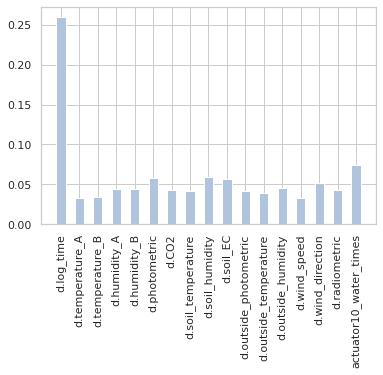

d.log_time    0.25968857741627327
d.temperature_A    0.033094776681673724
d.temperature_B    0.03351185279709449
d.humidity_A    0.04467831290658057
d.humidity_B    0.04431302974627238
d.photometric    0.05817464279457976
d.CO2    0.0424848938389997
d.soil_temperature    0.04110267795273211
d.soil_humidity    0.05939728253308486
d.soil_EC    0.05622143697150901
d.outside_photometric    0.041060504850284646
d.outside_temperature    0.03953428614407919
d.outside_humidity    0.04504129522756589
d.wind_speed    0.03270164394114098
d.wind_direction    0.05124514483092272
d.radiometric    0.04308556984464843
actuator10_water_times    0.07466407152255812


In [27]:
plt.bar(X_train.columns,
        model.feature_importances_,
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', ]
        )
plt.xticks(rotation='vertical')
plt.show()

for i in range(len(X_train.columns)):
  print(X_train.columns[i],'  ',model.feature_importances_[i])

0    19153
1      792
Name: actuator10, dtype: int64

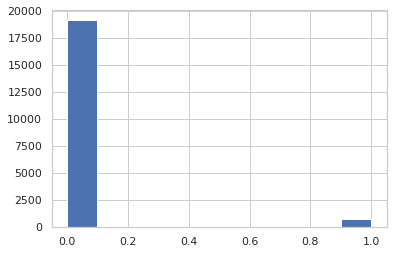

In [ ]:
n = 'actuator10'
lb = y_train[n]
lb.hist()
lb.value_counts()

分類準確率 :  0.9321478708469817
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8246
           1       0.16      0.21      0.18       302

    accuracy                           0.93      8548
   macro avg       0.56      0.58      0.57      8548
weighted avg       0.94      0.93      0.94      8548



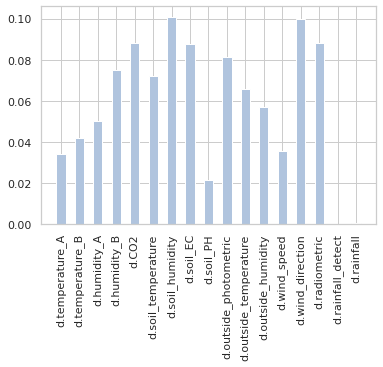

d.temperature_A    0.03407286191375293
d.temperature_B    0.04202635801818978
d.humidity_A    0.050039316358356914
d.humidity_B    0.07523931520336011
d.photometric    0.08816734994072044
d.CO2    0.07215177065455075
d.soil_temperature    0.10094297257042488
d.soil_humidity    0.08793204512277536
d.soil_EC    0.021617265599189476
d.soil_PH    0.08125239468415019
d.outside_photometric    0.06553693342057283
d.outside_temperature    0.0572051945183727
d.outside_humidity    0.035336254852614477
d.wind_speed    0.09971978973603837
d.wind_direction    0.0881202922875994
d.radiometric    0.0
d.rainfall_detect    0.0006398851193314601


In [ ]:
def get_models(number):
  model = None
  if number == 'actuator09':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=20,
                                                  random_state=2)
  elif number == 'actuator10':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  #max_depth=10,
                                                  random_state=2)
  elif number == 'actuator11':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=1,
                                                  random_state=2)
  return model

X_train_2 = X_train.drop(['d.photometric'],axis=1)
X_test_2 = X_test.drop(['d.photometric'],axis=1)
model = get_models(n)
dtree = model.fit(X_train_2,y_train[n])
y_predict = model.predict(X_test_2)
print('分類準確率 : ',accuracy_score(y_test[n],y_predict))
print(classification_report(y_test[n],y_predict,target_names=['0','1']))

plt.bar(X_train_2.columns,
        dtree.feature_importances_,
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', ]
        )
plt.xticks(rotation='vertical')
plt.show()

for i in range(len(X_train_2.columns)):
  print(X_train.columns[i],'  ',dtree.feature_importances_[i])